In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import skew, kurtosis, shapiro


In [12]:

file_path = r'C:\Users\hp\Desktop\10 Acadamy\VS code\insurance-risk-analytics\insurance-risk-analytics-week3\data\MachineLearningRating_v3.txt'

# Read with pipe delimiter
df = pd.read_csv(file_path, sep='|', engine='python')

# Check columns now
print(df.columns)
df.info()
df.isna().sum()


Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data 

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [13]:
# 3. Data Quality Checks
print("\nMissing Values Count:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicates:", df.duplicated().sum())

# Check for negative values in premiums or claims
print("\nNegative values in TotalPremium:", (df['TotalPremium'] < 0).sum())
print("Negative values in TotalClaims:", (df['TotalClaims'] < 0).sum())


Missing Values Count:
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
Numbe

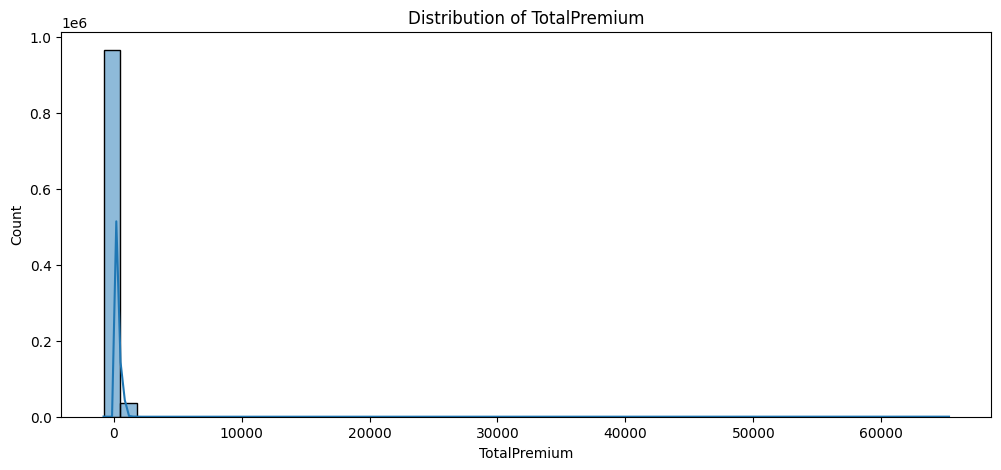

In [14]:
# 4. Univariate Analysis
plt.figure(figsize=(12,5))
sns.histplot(df['TotalPremium'], bins=50, kde=True)
plt.title('Distribution of TotalPremium')
plt.show()



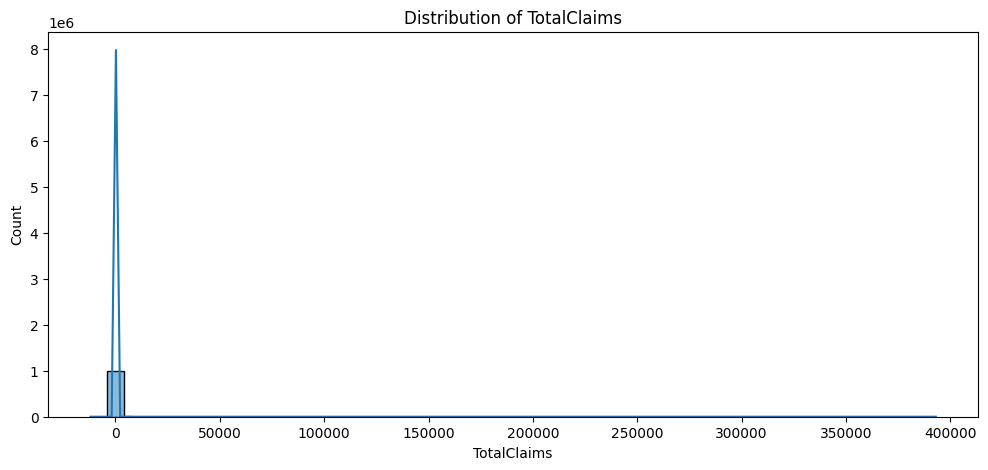

In [15]:
plt.figure(figsize=(12,5))
sns.histplot(df['TotalClaims'], bins=50, kde=True)
plt.title('Distribution of TotalClaims')
plt.show()


Claim Frequency: 0.0028


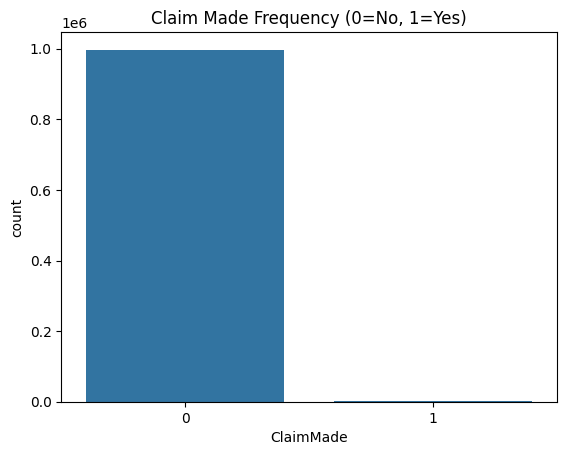

In [16]:
# Claim frequency: count of claims > 0
df['ClaimMade'] = np.where(df['TotalClaims'] > 0, 1, 0)
claim_freq = df['ClaimMade'].mean()
print(f"\nClaim Frequency: {claim_freq:.4f}")

sns.countplot(x='ClaimMade', data=df)
plt.title('Claim Made Frequency (0=No, 1=Yes)')
plt.show()

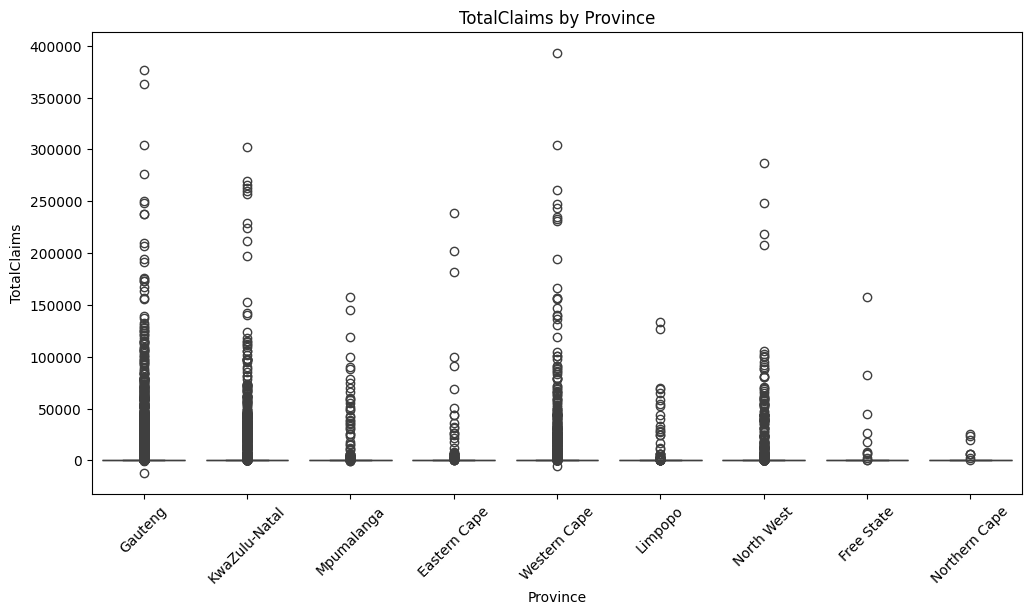

In [17]:

# 5. Bivariate Analysis
plt.figure(figsize=(12,6))
sns.boxplot(x='Province', y='TotalClaims', data=df)
plt.xticks(rotation=45)
plt.title('TotalClaims by Province')
plt.show()



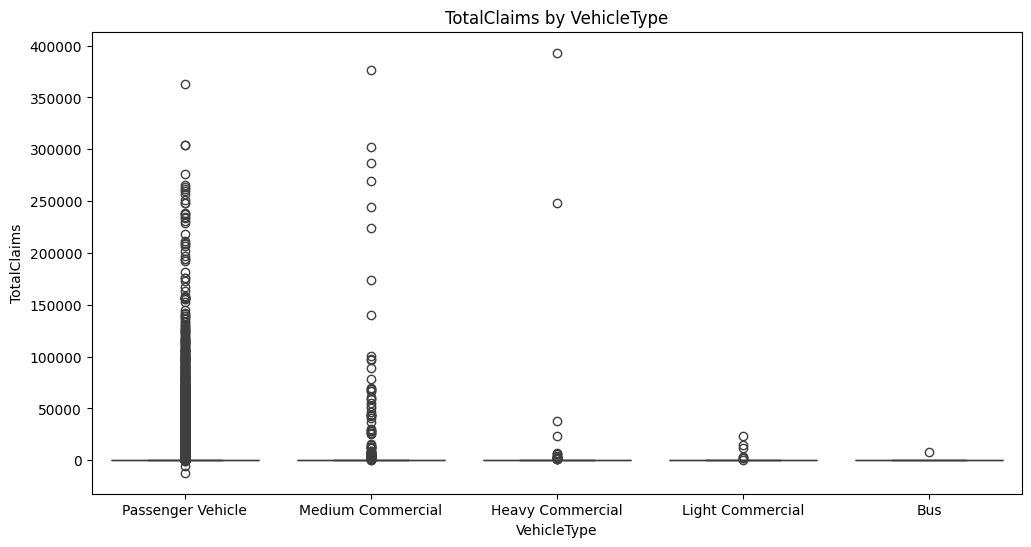

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x='VehicleType', y='TotalClaims', data=df)
plt.title('TotalClaims by VehicleType')
plt.show()



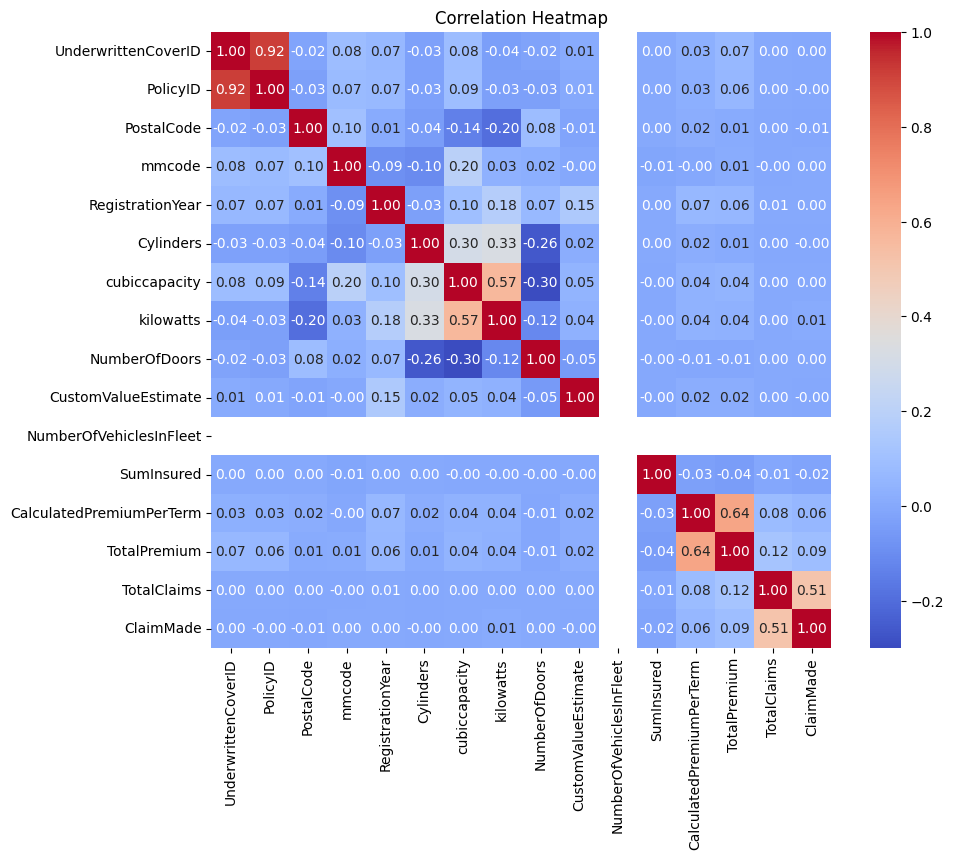

In [19]:
# Correlation heatmap for numeric variables
plt.figure(figsize=(10,8))
num_vars = df.select_dtypes(include=np.number)
sns.heatmap(num_vars.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

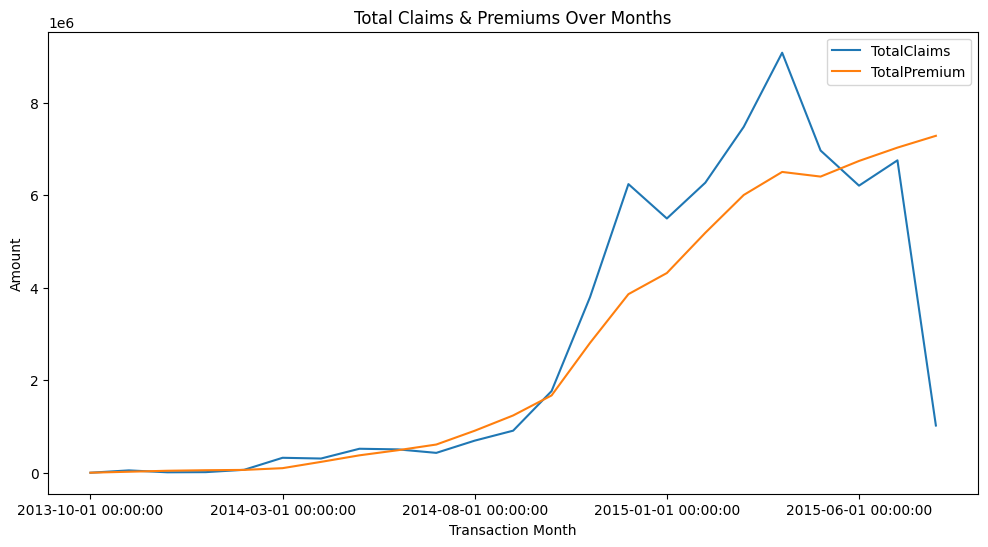

In [20]:
# 6. Temporal Trends
plt.figure(figsize=(12,6))
monthly_claims = df.groupby('TransactionMonth')['TotalClaims'].sum()
monthly_premiums = df.groupby('TransactionMonth')['TotalPremium'].sum()

monthly_claims.plot(label='TotalClaims')
monthly_premiums.plot(label='TotalPremium')
plt.title('Total Claims & Premiums Over Months')
plt.xlabel('Transaction Month')
plt.ylabel('Amount')
plt.legend()
plt.show()

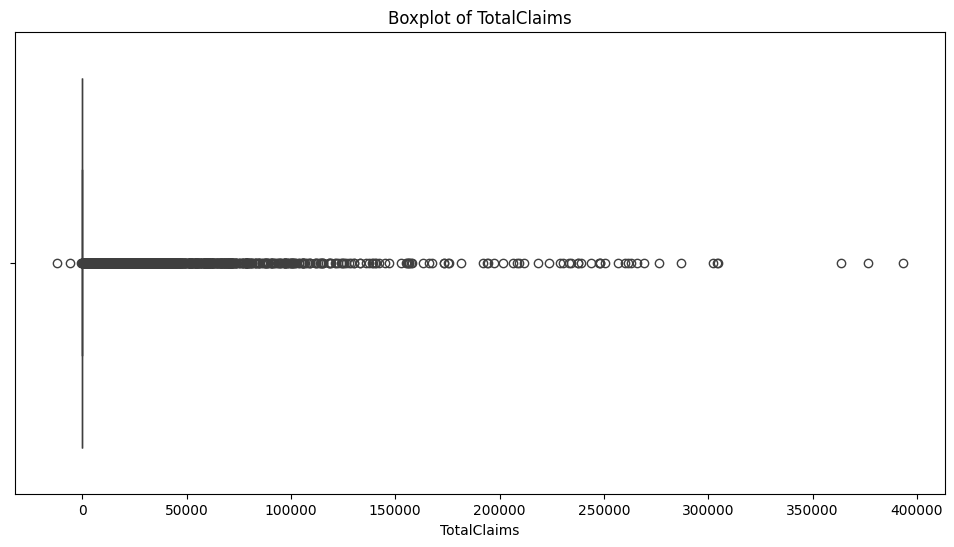

In [21]:
# 7. Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(x=df['TotalClaims'])
plt.title('Boxplot of TotalClaims')
plt.show()



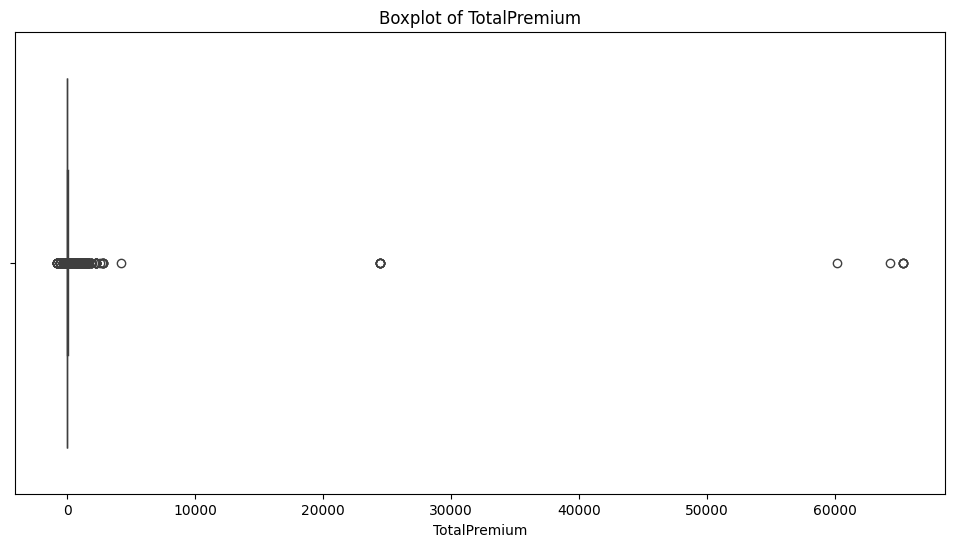

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['TotalPremium'])
plt.title('Boxplot of TotalPremium')
plt.show()

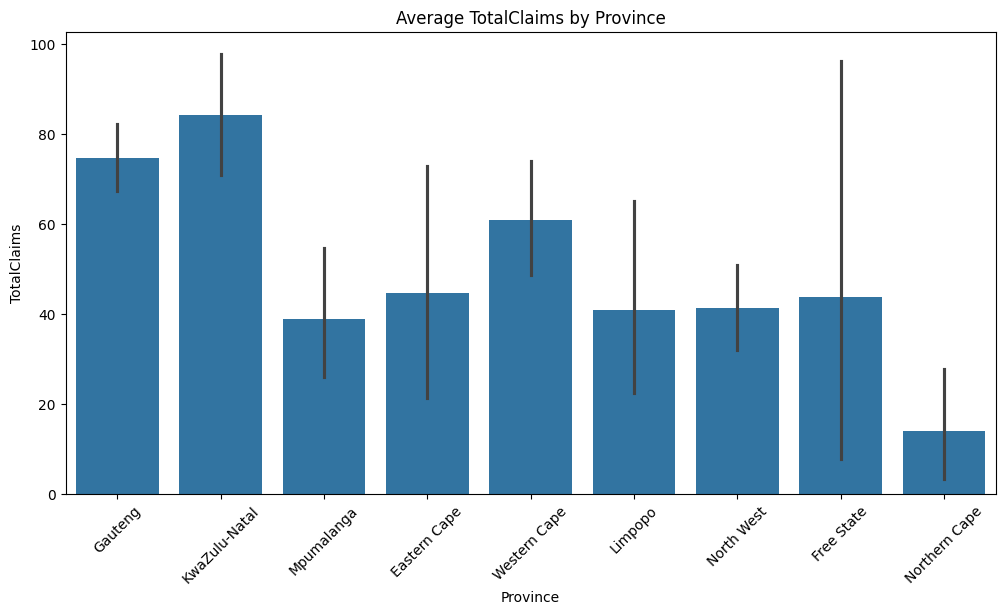

In [23]:
# 8. Geographical Insights
plt.figure(figsize=(12,6))
sns.barplot(x='Province', y='TotalClaims', data=df, estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Average TotalClaims by Province')
plt.show()

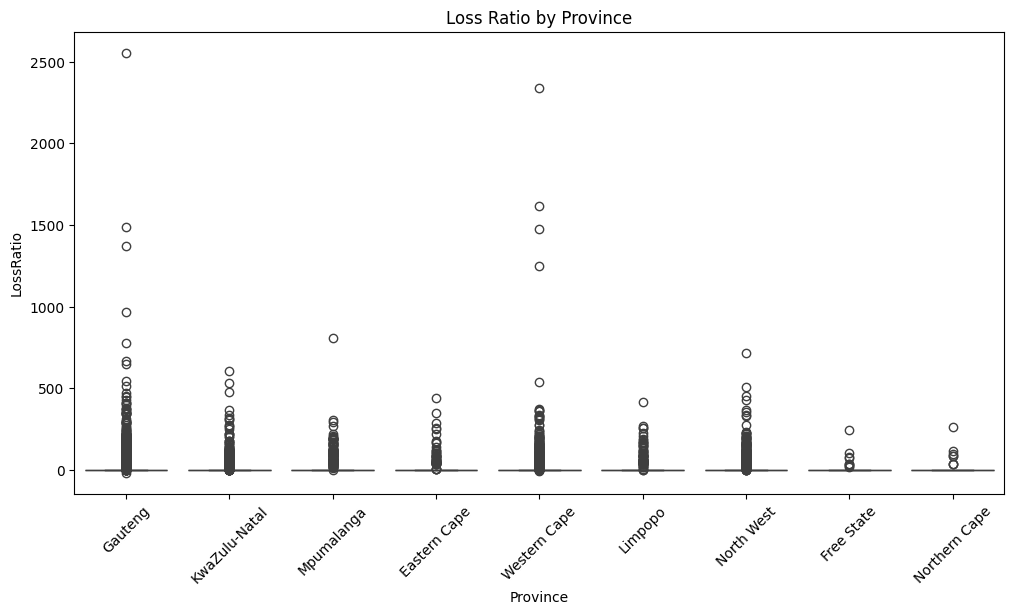

In [24]:
# 9. Additional Insights: Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
plt.figure(figsize=(12,6))
sns.boxplot(x='Province', y='LossRatio', data=df)
plt.xticks(rotation=45)
plt.title('Loss Ratio by Province')
plt.show()



In [25]:
# Save the cleaned and enriched dataframe for future tasks
df.to_csv('insurance_data_eda.csv', index=False)

print("\nEDA complete. Results saved to insurance_data_eda.csv")


EDA complete. Results saved to insurance_data_eda.csv
